Jared Crebo 30085839

PHYS 381: Assignment 4

Fourier analysis using Python

Kernel: Python 3.10.11 | IDE: Visual Studio Code

1 Fourier series

1.2a Write a Python code for the computation of the integral $I = \int_{0}^{1}exp(x)$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal

def function(k,omega,x):
    # Only dependent on x, takes 3 parameters to allow function to pass through other functions
    return np.exp(x)

def one(k,omega,x):
    # Only dependent on x, takes 3 parameters to allow function to pass through other functions
    # Used as a function to calculate Fourier coefficient ao
    return 1

def simpsons_rule(a, b, n, f1, f2, k, omega):
    '''
    Implementation of Simpson's Rule
    a - lower bound of x
    b - upper bound of x
    f1 - f(x)
    f2 - func_ak, func_bk, or one to calculate respective Fourier coefficients
    k - k
    omega - frequency
    '''

    # Check if n is an even number
    if n % 2 == 0:
        # Length of step
        h = (b - a) / n
        # Define array of n steps between a and b
        x = np.linspace(a, b, n)
        
        A = 0
        B = 0
        # First iterative section
        for j in range(1,int(n/2-1)):
            A += f1(k, omega, x[2*j])*f2(k, omega, x[2*j])
        # Second iterative section
        for j in range(1,int(n/2)):
            B += f1(k, omega, x[2*j-1])*f2(k, omega, x[2*j-1])
        # Simpson's Rule
        return h/3 * ( f1(k, omega, a)*f2(k, omega, a) + 2*A + 4*B + f1(k, omega, b)*f2(k, omega, b) )
    else:
        # Will cause an error if n is not an even number
        return None

print("The integral of f(x) = exp(x) evaluated between 0 and 1 using Simpson's Rule and 50 steps is: " + str(simpsons_rule(0,1,50,function,one,1,1)))
print("The integral of f(x) = exp(x) evaluated between 0 and 1 using Simpson's Rule and 100 steps is: " + str(simpsons_rule(0,1,100,function,one,1,1)))
print("The analytical solution is " + str(np.exp(1) - np.exp(0)))

The integral of f(x) = exp(x) evaluated between 0 and 1 using Simpson's Rule and 50 steps is: 1.630467639627117
The integral of f(x) = exp(x) evaluated between 0 and 1 using Simpson's Rule and 100 steps is: 1.6741440818144766
The analytical solution is 1.718281828459045


1.2b Write a Python code to compute and plot the Fourier coefficients $a_{k}$ and $b_{k}$ for the following functions:

1) $f(t)=sin(\omega t)$

2) $f(t)=cos(\omega t) + 3cos(2\omega t) - 4cos(3\omega t)$

3) $f(t)=sin(\omega t) + 3sin(3\omega t) + 5sin(5\omega t)$

4) $f(t)=sin(\omega t) + 2cos(3\omega t) + 3sin(5\omega t)$

Text(0.5, 1.0, 'Fourier Coefficients of func4(t)')

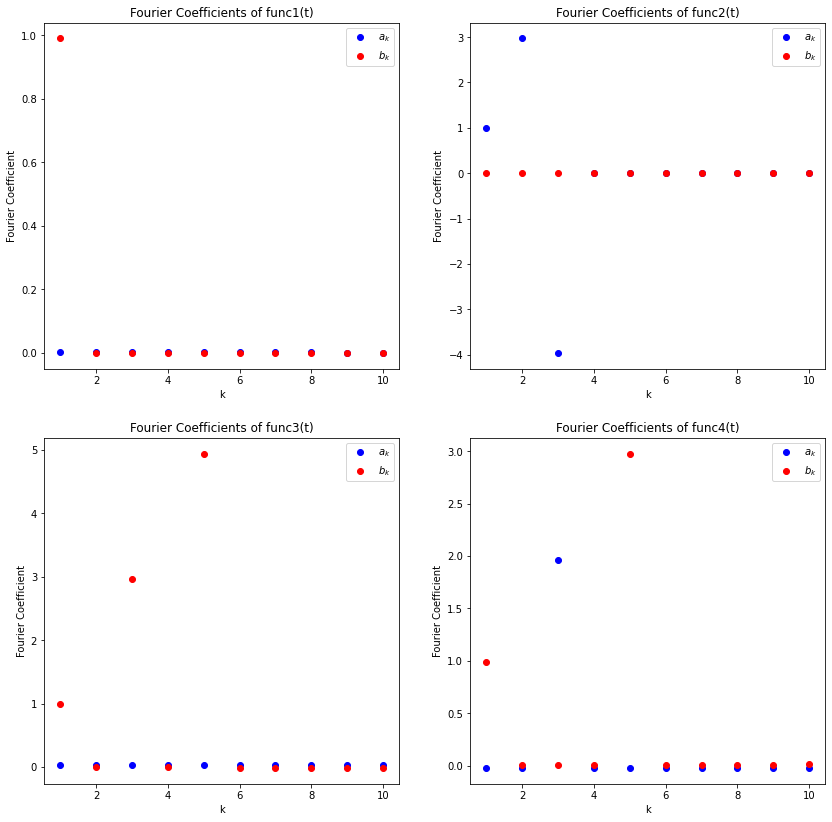

In [8]:
# Initialize constants
omega = 1 # Frequency rad/s
T = 2*np.pi / omega # Period in secs
ak = np.empty([4,10]) # Initialize storage of ak Fourier coefficients
bk = np.empty([4,10]) # Initialize storage of bk Fourier coefficients
K = np.linspace(1,10,10) # values of k

# Define Function 1
def func1(k,omega,t):
    return np.sin(omega * t)

# Define Function 2
def func2(k,omega,t):
    return np.cos(omega * t) + 3*np.cos(2*omega*t) - 4*np.cos(3*omega*t)

# Define Function 3
def func3(k,omega,t):
    return np.sin(omega*t) + 3*np.sin(3*omega*t) + 5*np.sin(5*omega*t)

# Define Function 4
def func4(k,omega,t):
    return np.sin(omega*t) + 2*np.cos(3*omega*t) + 3*np.sin(5*omega*t)

# Function to calculate ak
def func_ak(k,omega,t):
    return np.cos(k*omega*t)

# Function to calculate bk
def func_bk(k,omega,t):
    return np.sin(k*omega*t)

# Returns Fourier coefficient ak, bk, or ao*2
def fourier_coeff(f1, f2, T, k, omega):
    '''
    f1 - function
    f2 - func_ak to calculate ak, func_bk to calculate bk, one to calculate ao*2
    T - period 2pi / w
    k - k
    omega - frequency
    '''
    # Calculate any Fourier coefficient
    F = simpsons_rule(0, T, 100, f1, f2, k, omega)
    return 2 / T * F

# Initialize array containing all four functions
functions = [func1, func2, func3, func4]
for k in K: # For each value of k = 1, 2, 3,..., 10
    k = int(k)
    for f in range(len(functions)): # For each function
        # Calculate array of ak coefficients
        ak[f,k-1] = fourier_coeff(functions[f], func_ak, T, k, omega)
        # Calculate array of bk coefficients
        bk[f,k-1] = fourier_coeff(functions[f], func_bk, T, k, omega)


fig, ax = plt.subplots(2,2,figsize=[14,14])
# Plot func1 coefficients
ax[0,0].scatter(K, ak[0,:], color = 'blue', label = '$a_k$')
ax[0,0].scatter(K, bk[0,:], color = 'red', label = '$b_k$')
ax[0,0].legend()
ax[0,0].set_xlabel("k")
ax[0,0].set_ylabel("Fourier Coefficient")
ax[0,0].set_title("Fourier Coefficients of func1(t)")
# Plot func2 coefficients
ax[0,1].scatter(K, ak[1,:], color = 'blue', label = '$a_k$')
ax[0,1].scatter(K, bk[1,:], color = 'red', label = '$b_k$')
ax[0,1].legend()
ax[0,1].set_xlabel("k")
ax[0,1].set_ylabel("Fourier Coefficient")
ax[0,1].set_title("Fourier Coefficients of func2(t)")
# Plot func3 coefficients
ax[1,0].scatter(K, ak[2,:], color = 'blue', label = '$a_k$')
ax[1,0].scatter(K, bk[2,:], color = 'red', label = '$b_k$')
ax[1,0].legend()
ax[1,0].set_xlabel("k")
ax[1,0].set_ylabel("Fourier Coefficient")
ax[1,0].set_title("Fourier Coefficients of func3(t)")
# Plot func4 coefficients
ax[1,1].scatter(K, ak[3,:], color = 'blue', label = '$a_k$')
ax[1,1].scatter(K, bk[3,:], color = 'red', label = '$b_k$')
ax[1,1].legend()
ax[1,1].set_xlabel("k")
ax[1,1].set_ylabel("Fourier Coefficient")
ax[1,1].set_title("Fourier Coefficients of func4(t)")

1.2c Analyse the square wave with period $T=2\pi / \omega$ where $\omega = 1$ and $\theta = \omega t$

$f(\theta) = 1$ if $0 \leq \theta \leq \pi$, $f(\theta) = -1$ if $\pi < \theta \leq 2\pi$

ak (k = 1, 3, 5) = 0.02663646427819803 0.026395391468997574 0.025916142236784727
Analytical = 0 0 0
Absolute Error = 0.02663646427819803 0.026395391468997574 0.025916142236784727 

bk (k = 1, 3, 5) = 1.2595557177199583 0.4173283193031057 0.24741187421731153
Analytical = 1.2732395447351628 0.4244131815783876 0.25464790894703254
Absolute Error = -0.01368382701520443 -0.007084862275281878 -0.007236034729721008 

bk (k = 2, 4, 6) = -0.002322777685262758 -0.0046196772317202775 -0.006865267854276755
Analytical = 0 0 0
Absolute Error = -0.002322777685262758 -0.0046196772317202775 -0.006865267854276755 



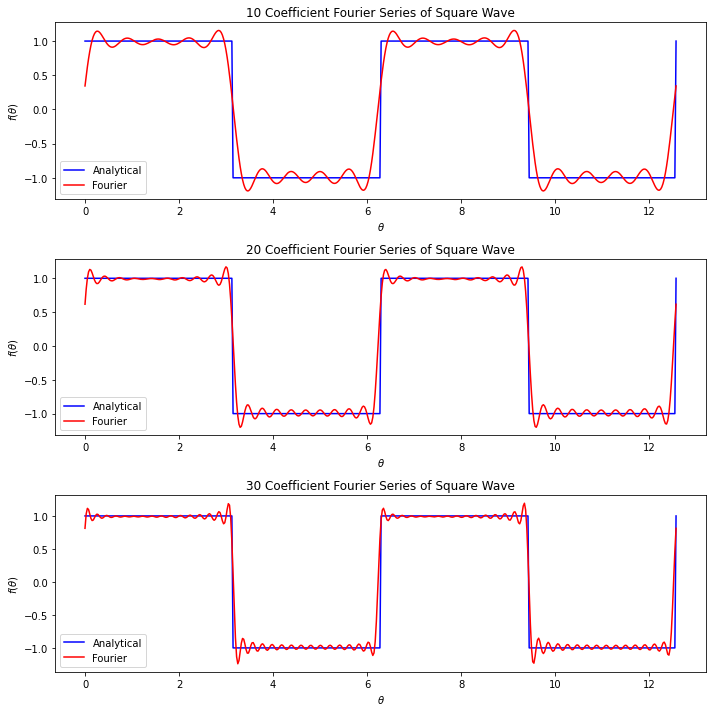

In [ ]:
# Define square wave
def func_square(k, omega, t):
    # Only dependent on omega and t, takes 3 parameters to allow function to pass through other functions
    return signal.square(omega*t)

# Define time domain
t = np.linspace(0,4*np.pi,500)

def func_analytical(func, k, omega, t):
    '''
    Calculates the analytical function "func" with respect to t
    func - analytical function
    k - k
    omega - frequency
    t - time
    '''
    # For each timestep, calculate func(t)
    f = np.empty(len(t))
    for i in range(len(t)):
        f[i] = func(k, omega, t[i])

    ak = np.empty(10)
    bk = np.empty(10)
    # For each k = 1, 2, 3,..., 10
    for k in K:
        k = int(k)
        # Calculate fourier coefficients ak and bk (non-analytical) for comparison to analytical later
        ak[k-1] = fourier_coeff(func, func_ak, T, k, omega)
        bk[k-1] = fourier_coeff(func, func_bk, T, k, omega)
    return ak, bk, f

ak, bk, f_square = func_analytical(func_square, k, omega, t)

# Comparison of ak, bk coefficients to analytical formulas
print("ak (k = 1, 3, 5) =",ak[0],ak[2],ak[4])
print("Analytical =",0,0,0)
print("Absolute Error =",ak[0],ak[2],ak[4],"\n")
print("bk (k = 1, 3, 5) =",bk[0],bk[2],bk[4])
print("Analytical =",(4/(np.pi*1)),(4/(np.pi*3)),(4/(np.pi*5)))
print("Absolute Error =",bk[0]-(4/(np.pi*1)),bk[2]-(4/(np.pi*3)),bk[4]-(4/(np.pi*5)),"\n")
print("bk (k = 2, 4, 6) =",bk[1],bk[3],bk[5])
print("Analytical =",0,0,0)
print("Absolute Error =",bk[1],bk[3],bk[5],"\n")

def reconstructed(n, func, T, omega, t):
    '''
    Reconstruct the original function "func" using the Fourier series
    n - number of Fourier coefficients
    func - original function
    T - period
    omega - frequency
    t - time
    '''
    # Number of fourier coefficients
    K = np.linspace(1,n,n)
    # Calculate fourier coefficient ao
    function = 0.5*fourier_coeff(func, one, T, 1, omega)
    for k in K: # For each k
        k = int(k)
        # Calculate fourier coefficient ak
        A = fourier_coeff(func, func_ak, T, k, omega)
        # Calculate fourier coefficient bk
        B = fourier_coeff(func, func_bk, T, k, omega)
        # Calculate fourier series
        function += A * np.cos(k*omega*t) + B * np.sin(k*omega*t)
    return function


fig, ax = plt.subplots(3,1,figsize=[10,10])
# Plot Fourier series of square wave with 10 coefficients
ax[0].plot(omega*t, f_square, color = 'blue', label = 'Analytical')
ax[0].set_xlabel(r"$\theta$")
ax[0].set_ylabel(r"$f(\theta)$")
ax[0].set_title("10 Coefficient Fourier Series of Square Wave")
ax[0].plot(omega*t, reconstructed(10, func_square, T, omega, t), color = 'red', label = 'Fourier')
ax[0].legend()
# Plot Fourier series of square wave with 20 coefficients
ax[1].plot(omega*t, f_square, color = 'blue', label = 'Analytical')
ax[1].set_xlabel(r"$\theta$")
ax[1].set_ylabel(r"$f(\theta)$")
ax[1].set_title("20 Coefficient Fourier Series of Square Wave")
ax[1].plot(omega*t, reconstructed(20, func_square, T, omega, t), color = 'red', label = 'Fourier')
ax[1].legend()
# Plot Fourier series of square wave with 10 coefficients
ax[2].plot(omega*t, f_square, color = 'blue', label = 'Analytical')
ax[2].set_xlabel(r"$\theta$")
ax[2].set_ylabel(r"$f(\theta)$")
ax[2].set_title("30 Coefficient Fourier Series of Square Wave")
ax[2].plot(omega*t, reconstructed(30, func_square, T, omega, t), color = 'red', label = 'Fourier')
ax[2].legend()
fig.tight_layout()

1.2d Analyse the pulse train with period $T=2\pi/\omega$ as:

$f(\omega t) = 1$ if $0 \leq \omega t \leq \omega\tau$ and $f(\omega t) = -1$ if $\omega\tau < \omega t \leq 2\pi$

ao = -0.21857278851286963
Analytical = -0.7142857142857143
Absolute Error = 0.49571292577284465 

ak (k = 1,2,3)= 0.5308829855948936 0.3389426245928771 0.11750825031939668
Analytical = 0.4977293803986058 0.31032919276399695 0.092072989077005
Absolute Error = 0.03315360519628774 0.028613431828880154 0.02543526124239169 

bk (k = 1,2,3) = 0.24213686437122564 0.3906065240275589 0.3997677551167846
Analytical = 0.23969383663476598 0.3891404993449359 0.40339812265396563
Absolute Error = 0.0024430277364596575 0.0014660246826230239 -0.003630367537181045


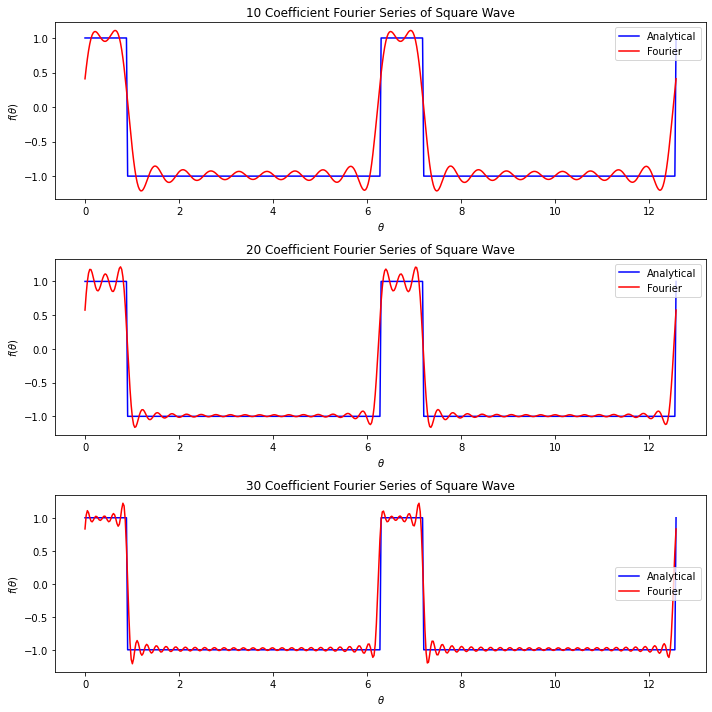

In [ ]:
# Initialize offset constant
alpha = 7

# Define pulse train function
def func_pulse(k, omega, t):
    return signal.square(omega * t, duty = omega/alpha)

# Calculate ak, bk, and analytical function
ak, bk, f_pulse = func_analytical(func_pulse, 1, omega, t)

# Comparison of ao, ak, bk coefficients to analytical formulas
print("ao =",1/T * fourier_coeff(func_pulse, one, T, 1, omega))
print("Analytical =",2/alpha-1)
print("Absolute Error =",1/T * fourier_coeff(func_pulse, one, T, 1, omega) - (2/alpha-1), "\n")
print("ak (k = 1,2,3)=",ak[0],ak[1],ak[2])
print("Analytical =",2/(1*np.pi)*np.sin(2*1*np.pi/alpha), 2/(2*np.pi)*np.sin(2*2*np.pi/alpha),2/(3*np.pi)*np.sin(2*3*np.pi/alpha))
print("Absolute Error =",ak[0] - 2/(1*np.pi)*np.sin(2*1*np.pi/alpha), ak[1] - 2/(2*np.pi)*np.sin(2*2*np.pi/alpha), ak[2] - 2/(3*np.pi)*np.sin(2*3*np.pi/alpha),"\n")
print("bk (k = 1,2,3) =",bk[0],bk[1],bk[2])
print("Analytical =", 2/(1*np.pi)*(1-np.cos(2*1*np.pi/alpha)), 2/(2*np.pi)*(1-np.cos(2*2*np.pi/alpha)), 2/(3*np.pi)*(1-np.cos(2*3*np.pi/alpha)))
print("Absolute Error =",bk[0] - 2/(1*np.pi)*(1-np.cos(2*1*np.pi/alpha)), bk[1] - 2/(2*np.pi)*(1-np.cos(2*2*np.pi/alpha)), bk[2] - 2/(3*np.pi)*(1-np.cos(2*3*np.pi/alpha)))

fig, ax = plt.subplots(3,1,figsize=[10,10])
# Plot Fourier series of pulse train with 10 coefficients
ax[0].plot(omega*t, f_pulse, color = 'blue', label = 'Analytical')
ax[0].set_xlabel(r"$\theta$")
ax[0].set_ylabel(r"$f(\theta)$")
ax[0].set_title("10 Coefficient Fourier Series of Square Wave")
ax[0].plot(omega*t, reconstructed(10, func_pulse, T, omega, t), color = 'red', label = 'Fourier')
ax[0].legend()
# Plot Fourier series of pulse train with 20 coefficients
ax[1].plot(omega*t, f_pulse, color = 'blue', label = 'Analytical')
ax[1].set_xlabel(r"$\theta$")
ax[1].set_ylabel(r"$f(\theta)$")
ax[1].set_title("20 Coefficient Fourier Series of Square Wave")
ax[1].plot(omega*t, reconstructed(20, func_pulse, T, omega, t), color = 'red', label = 'Fourier')
ax[1].legend()
# Plot Fourier series of pulse train with 30 coefficients
ax[2].plot(omega*t, f_pulse, color = 'blue', label = 'Analytical')
ax[2].set_xlabel(r"$\theta$")
ax[2].set_ylabel(r"$f(\theta)$")
ax[2].set_title("30 Coefficient Fourier Series of Square Wave")
ax[2].plot(omega*t, reconstructed(30, func_pulse, T, omega, t), color = 'red', label = 'Fourier')
ax[2].legend()
fig.tight_layout()
